In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

import re  
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import string
import warnings

In [2]:
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn import svm, datasets

In [3]:
# ! pip install wordcloud
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score, recall_score,roc_curve, roc_auc_score, auc


In [4]:
# ! pip install tensorflow

In [5]:
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import class_weight
from sklearn.preprocessing import label_binarize
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Dropout,GRU
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler

In [6]:
train = pd.read_csv("C:\\Users\\RAM SHANKER\\Dropbox\\PC\\Desktop\\e_comerce\\train_data.csv")
test = pd.read_csv("C:\\Users\\RAM SHANKER\\Dropbox\\PC\\Desktop\\e_comerce\\test_data.csv")
test_val = pd.read_csv("C:\\Users\\RAM SHANKER\\Dropbox\\PC\\Desktop\\e_comerce\\test_data_hidden.csv")

In [7]:
train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [8]:
test.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [9]:
test_val.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [10]:
train.shape,test.shape,test_val.shape

((4000, 8), (1000, 7), (1000, 8))

# EDA Analysis

In [11]:
train.duplicated().sum(),test.duplicated().sum(),test_val.duplicated().sum()

(58, 3, 3)

In [12]:
train = train[train.duplicated()==False]
train.shape

(3942, 8)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3942 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               3942 non-null   object
 1   brand              3942 non-null   object
 2   categories         3942 non-null   object
 3   primaryCategories  3942 non-null   object
 4   reviews.date       3942 non-null   object
 5   reviews.text       3942 non-null   object
 6   reviews.title      3932 non-null   object
 7   sentiment          3942 non-null   object
dtypes: object(8)
memory usage: 277.2+ KB


In [14]:
test_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
 7   sentiment          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


In [16]:
pd.set_option('display.max_colwidth',150)

#Reviews containing Positive Sentiments
train[train.sentiment=='Positive'][['reviews.text','reviews.title']].head()

,reviews.text,reviews.title
0,Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ad...,Powerful tablet
1,I purchased two Amazon in Echo Plus and two dots plus four fire sticks and the hub Philips hue for lamp for the family at Christmas 2017. I‚Äôm so...,Amazon Echo Plus AWESOME
3,"very good product. Exactly what I wanted, and a very good price",Greattttttt
4,This is the 3rd one I've purchased. I've bought one for all of my nieces. No other case compares to this one. It has held protected the tablet so ...,Very durable!
5,This is a great product. Light weight. I wish it has wifi to download from online.,You will love it


In [17]:
train[train.sentiment=='Neutral'][['reviews.text','reviews.title']].head()

,reviews.text,reviews.title
2,Just an average Alexa option. Does show a few things on screen but still limited.,Average
6,"My 7-year old daughter saved up to by this. Her brother bought the 8GB about a year earlier, so new she needed more space. The OS is a bit clunky,...",OK For Entry Level Tablet
17,"Not as good as before the old kindle, just seams to work better",Not as good as before
59,There is nothing spectacular about this item but also nothing majorly wrong with it. The biggest flaw is that this is geared to kids and there is ...,"Does what it says, missing one key feature"
95,It's unfair for me to rate this product cause I have not even taken it out of the box to set it up.,Haven't set it up yet


In [18]:
train[train.sentiment=='Negative'][['reviews.text','reviews.title']].head()

,reviews.text,reviews.title
9,"was cheap, can not run chrome stuff, returned to store.","was cheap, can not run chrome stuff, returned"
97,"Worthless, except as a regular echo and a poor excuse for video chat. I love my echo devices, bathroom, pool, kitchen, other places where I may ne...",Useless screen so why pay for it?
104,Too bad Amazon turned this tablet into a big advertising tool. Many apps dont work and the camera is not good.,Amazon Fire 7 Tablet
121,"I bought this Kindle for my 7 year old grand-daughter. I bought a warranty for it. I bought it in August, I have already had to replace it. The ch...",Kid's Kindle
150,"I am reading positive reviews and wish I could say the same. Best Buy is great, so this is not a reflection on them, just our experience with the ...",Have never purchased a more frustrating Device


In [19]:
train.sentiment.value_counts()

Positive    3694
Neutral      158
Negative      90
Name: sentiment, dtype: int64

In [20]:
pd.DataFrame(train.name.value_counts())

,name
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",676
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",628
Amazon - Echo Plus w/ Built-In Hub - Silver,483
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",446
"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",340
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",294
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,177
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",175
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",122
"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum",82


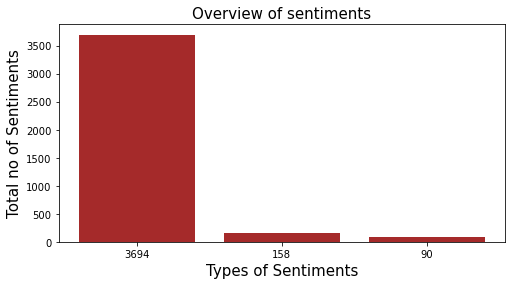

In [21]:
fig=plt.figure(figsize=(8,4))
overall_sentiment=("Positive","Neutral","Negative")

sentiments=(3694,158,90)


graph=plt.bar(overall_sentiment,sentiments,color='brown')

plt.xticks(overall_sentiment,sentiments)
plt.title('Overview of sentiments',fontsize=15)
plt.xlabel('Types of Sentiments',fontsize=15)
plt.ylabel('Total no of Sentiments',fontsize=15)

plt.show()

# Class Imbalance problem

In [22]:
train.brand.value_counts() , test_val.brand.value_counts()

(Amazon    3942
 Name: brand, dtype: int64,
 Amazon    1000
 Name: brand, dtype: int64)

In [23]:
train.primaryCategories.value_counts()

Electronics                    2562
Electronics,Hardware           1159
Office Supplies,Electronics     204
Electronics,Media                17
Name: primaryCategories, dtype: int64

In [24]:
test.primaryCategories.value_counts()

Electronics                    676
Electronics,Hardware           276
Office Supplies,Electronics     41
Electronics,Media                7
Name: primaryCategories, dtype: int64

In [25]:
pd.DataFrame(train.categories.value_counts())

,categories
"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",628
"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants",514
"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital Device 3",483
"Computers,Fire Tablets,Electronics Features,Computer Accessories,Tablets,Top Rated,Amazon Tablets,Electronics,Kids' Tablets,iPad & Tablets,Cases & Bags,Electronics, Tech Toys, Movies, Music,Computers & Tablets",446
"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",340
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",294
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets",231
"Amazon Echo,Home Theater & Audio,MP3 MP4 Player Accessories,Electronics,Portable Audio,Compact Radios Stereos,Smart Hubs & Wireless Routers,Featured Brands,Smart Home & Connected Living,Home Security,Kindle Store,Electronic Components,Home Automation,Mobile Bluetooth Speakers,Home, Garage & Office,Amazon Tap,Home,Mobile Speakers,TVs & Electronics,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Electronics Features,Frys,Speakers,Mobile,Digital Device 3,Smart Home,Home Improvement,Electronics, Tech Toys, Movies, Music,Smart Home & Home Automation Devices,Smart Hubs,MP3 Player Accessories,Home Safety & Security,Voice Assistants,Amazon Home,Alarms & Sensors,Portable Audio & Electronics,Amazon Devices,Audio,Bluetooth Speakers,MP3 Accessories,All Bluetooth & Wireless Speakers",177
"Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Wireless Speakers,Smart Home,Home Improvement,Voice Assistants,Amazon Home,Amazon",162
"Office,eBook Readers,Electronics Features,Walmart for Business,Tablets,Electronics,Amazon Ereaders,Office Electronics,iPad & Tablets,Kindle E-readers,All Tablets,Amazon Book Reader,Computers & Tablets",122


In [26]:
train.dtypes

name                 object
brand                object
categories           object
primaryCategories    object
reviews.date         object
reviews.text         object
reviews.title        object
sentiment            object
dtype: object

# Clean data

In [27]:
name =  list(set(list(train['name'])+list(test_val['name'])))
categories = list(set(list(train['categories'])+list(test_val['categories'])))
primaryCategories = list(train['primaryCategories'].unique())

le_name = LabelEncoder()
le_cat = LabelEncoder()
le_pri = LabelEncoder()
le_name.fit(name)
le_cat.fit(categories)
le_pri.fit(primaryCategories)

train['name'] = le_name.transform(train.name)
train['categories'] = le_cat.transform(train.categories)
train['primaryCategories'] = le_pri.transform(train.primaryCategories)
test_val['name'] = le_name.transform(test_val.name)
test_val['categories'] = le_cat.transform(test_val.categories)
test_val['primaryCategories'] = le_pri.transform(test_val.primaryCategories)
test['name'] = le_name.transform(test.name)
test['categories'] = le_cat.transform(test.categories)
test['primaryCategories'] = le_pri.transform(test.primaryCategories)


train['reviews.title'].fillna(value=' ',inplace=True)
test_val['reviews.title'].fillna(value=' ',inplace=True)
test['reviews.title'].fillna(value=' ',inplace=True)

tok = WordPunctTokenizer()
ps = PorterStemmer()
wnl = WordNetLemmatizer()
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
def data_cleaner(text):
    text = text.replace(r"Äú",'')
    text = text.replace(r'Äù','')
    text = text.replace(r'‚Äô','\'')
    text = text.lower()
    text = text.replace(r'‚Äô','\'')
    text = neg_pattern.sub(lambda x: negations_dic[x.group()], text)
    text = re.sub("[^a-zA-Z0-9\"]", " ", text)
    word_tok=[x for x in tok.tokenize(text) if len(x) > 3]
#     word_stem = [ps.stem(i) for i in word_tok]
#     return (" ".join(word_stem).strip())  
    word_lem = [wnl.lemmatize(i) for i in word_tok]
    return (" ".join(word_lem).strip()) 
for i in (train,test_val,test):
    i['reviews.text']=i['reviews.text'].apply(data_cleaner)
    i['reviews.title']=i['reviews.title'].apply(data_cleaner)

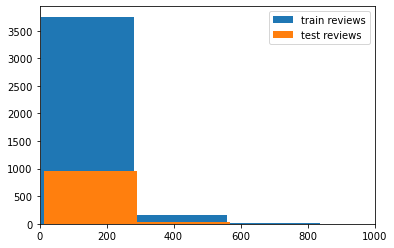

In [28]:
train_len=train["reviews.text"].str.len()
test_len=test["reviews.text"].str.len()
plt.hist(train_len,bins=20,label="train reviews")
plt.hist(test_len,bins=20,label="test reviews")
plt.legend()
plt.xlim(0,1000)
plt.show()

In [29]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 

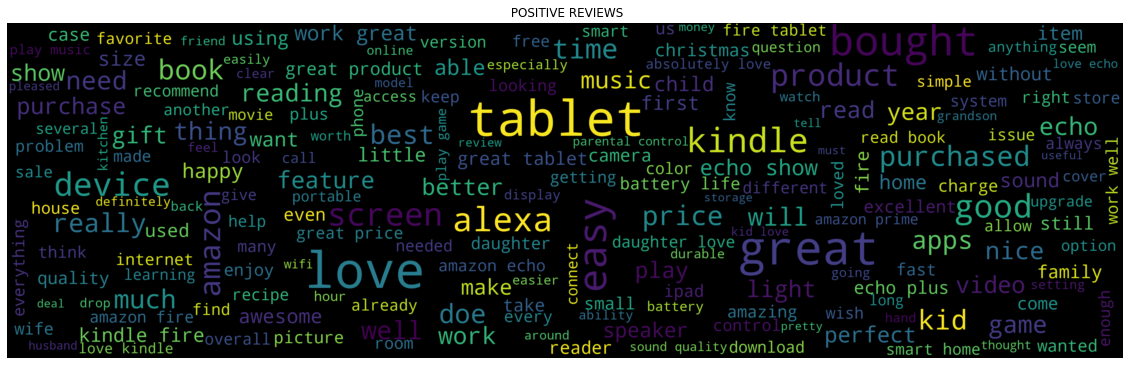

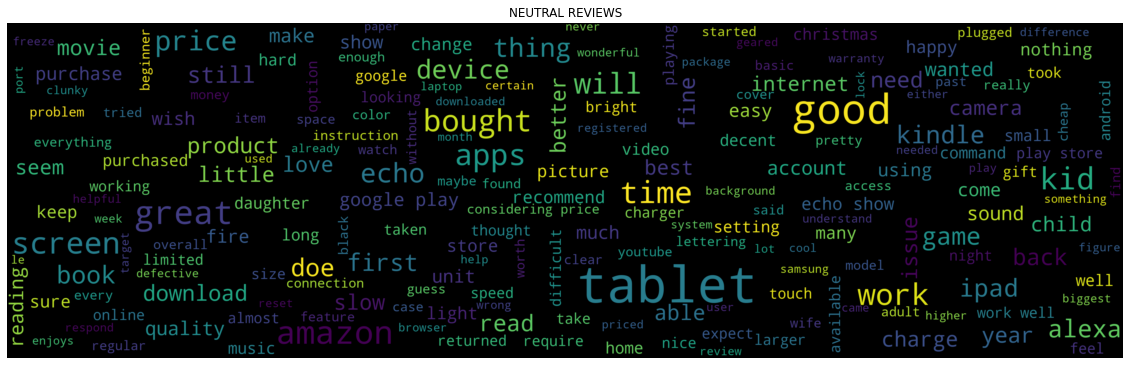

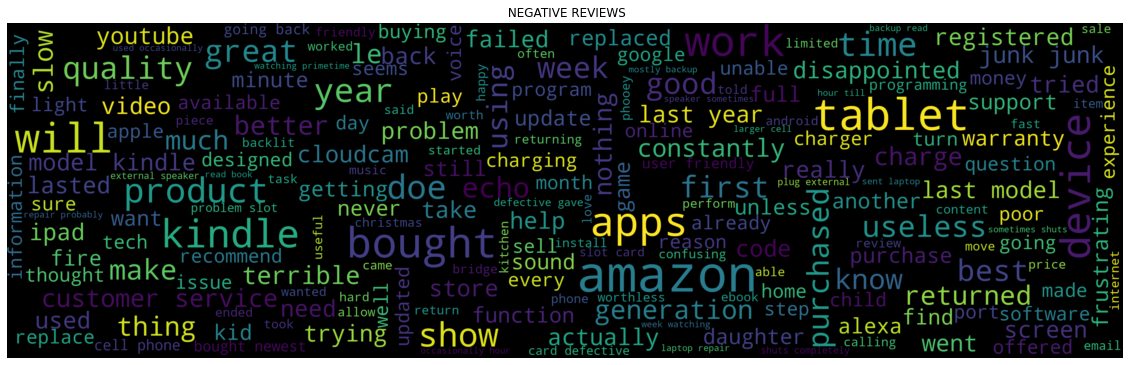

In [30]:
#all_text = ' '.join([text for text in train['reviews.text']])
pos_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Positive']])
neg_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Negative']])
neu_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Neutral']])

##########################

wordcloud = WordCloud(width=4000, height=1200, random_state=21, max_font_size=180).generate(pos_text)
plt.figure(figsize=(20,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' POSITIVE REVIEWS')
plt.show()

##########################

wordcloud = WordCloud(width=4000, height=1200, random_state=21,max_font_size=180).generate(neu_text)
plt.figure(figsize=(20,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('NEUTRAL REVIEWS')
plt.show()

##########################

wordcloud = WordCloud(width=4000, height=1200, random_state=21,max_font_size=180).generate(neg_text)
plt.figure(figsize=(20,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' NEGATIVE REVIEWS')
plt.show()

In [31]:
# print(pos_text)

In [32]:
le_senti = LabelEncoder()
train['sentiment'] = le_senti.fit_transform(train['sentiment'])
test_val['sentiment'] = le_senti.fit_transform(test_val['sentiment'])

# TFIDF Vectorizer

In [33]:
tvec1 = TfidfVectorizer()
tvec2 = TfidfVectorizer()
tvec3 = TfidfVectorizer()
train1 = train.reset_index()
combi1 = train1.append(test_val,ignore_index=True,sort=False)
# print(combi1)
tvec1.fit(combi1['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train1['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())
tvec2.fit(combi1['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train1['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())
Train_val1 = pd.concat([train1.drop(['brand','reviews.text','reviews.title','sentiment','index','reviews.date'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val1 = pd.concat([test_val.drop(['brand','reviews.text','reviews.title','sentiment','reviews.date'],axis=1),tvec_text2, tvec_title2],axis=1)
# print(Train_val1)
# print(Test_Val1)
x_train1=Train_val1.values
y_train1=train['sentiment'].values
x_test1=Test_Val1.values
y_test1 = test_val['sentiment'].values

## Run multinomial Naive Bayes classifier

In [34]:
NBC_model = MultinomialNB().fit(x_train1, y_train1)
pred_val=NBC_model.predict(x_test1)

In [35]:
accuracy = accuracy_score(y_test1,pred_val)
conf_met = confusion_matrix(y_test1,pred_val)
classification = classification_report(y_test1,pred_val)

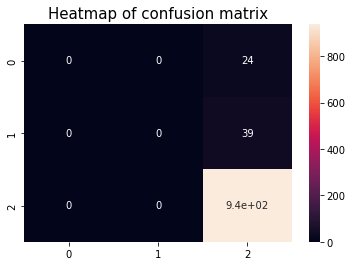

y_test,y_pred accuracy is : 0.937
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



In [36]:
plt.title("Heatmap of confusion matrix",fontsize = 15)
sns.heatmap(conf_met,annot = True)
plt.show()
# print(conf_met)
print( "y_test,y_pred accuracy is :",accuracy)
print(classification)

## RandomForestClassifier

In [37]:
classifier = RandomForestClassifier()
classifier.fit(x_train1, y_train1)
y_pred= classifier.predict(x_test1)

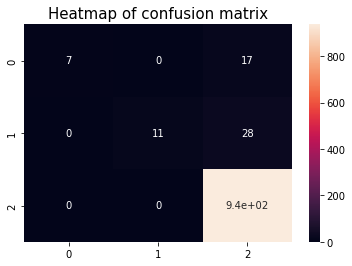

y_test,y_pred accuracy is : 0.955
              precision    recall  f1-score   support

           0       1.00      0.29      0.45        24
           1       1.00      0.28      0.44        39
           2       0.95      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.98      0.52      0.62      1000
weighted avg       0.96      0.95      0.94      1000



In [38]:
accuracy = accuracy_score(y_test1,y_pred)
conf_met = confusion_matrix(y_test1,y_pred)
plt.title("Heatmap of confusion matrix",fontsize = 15)
sns.heatmap(conf_met,annot = True)
plt.show()
# print(conf_met)
print( "y_test,y_pred accuracy is :",accuracy)
print(classification_report(y_test1,y_pred))

## XGBoost classifier

In [39]:
XGBclassifier = XGBClassifier()
XGBclassifier.fit(x_train1, y_train1)
y_pred= XGBclassifier.predict(x_test1)

[22:29:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


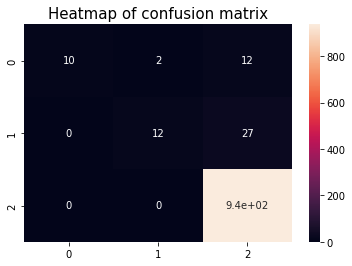

y_test,y_pred accuracy is : 0.959
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.86      0.31      0.45        39
           2       0.96      1.00      0.98       937

    accuracy                           0.96      1000
   macro avg       0.94      0.57      0.67      1000
weighted avg       0.96      0.96      0.95      1000



In [40]:
accuracy = accuracy_score(y_test1,y_pred)
conf_met = confusion_matrix(y_test1,y_pred)
plt.title("Heatmap of confusion matrix",fontsize = 15)
sns.heatmap(conf_met,annot = True)
plt.show()
# print(conf_met)
print( "y_test,y_pred accuracy is :",accuracy)
print(classification_report(y_test1,y_pred))

### Apply multi-class SVM’s and neural nets

In [41]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(x_train1, y_train1)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(x_train1, y_train1)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(x_train1, y_train1)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(x_train1, y_train1)

In [42]:
linear_pred = linear.predict(x_test1)
poly_pred = poly.predict(x_test1)
rbf_pred = rbf.predict(x_test1)
sig_pred = sig.predict(x_test1)

In [43]:
lin_accuracy = accuracy_score(y_test1, linear_pred)
poly_accuracy = accuracy_score(y_test1, poly_pred)
rbf_accuracy = accuracy_score(y_test1, rbf_pred)
sig_accuracy = accuracy_score(y_test1, sig_pred)
lin_f1 = f1_score(y_test1, linear_pred, average='weighted')
poly_f1 = f1_score(y_test1, poly_pred, average='weighted')
rbf_f1 = f1_score(y_test1, rbf_pred, average='weighted')
sig_f1 = f1_score(y_test1, sig_pred, average='weighted')

In [44]:
print('Accuracy (linear Kernel): ', "%.2f" % (lin_accuracy*100))
print('F1 (linear Kernel): ', "%.2f" % (lin_f1*100))
print("-----------------------------------------------")
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
print("-----------------------------------------------")
print('Accuracy (rbf Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (rbf Kernel): ', "%.2f" % (rbf_f1*100))
print("-----------------------------------------------")
print('Accuracy (sigmoide Kernel): ', "%.2f" % (sig_accuracy*100))
print('F1 (sigmoide Kernel): ', "%.2f" % (sig_f1*100))

Accuracy (linear Kernel):  94.90
F1 (linear Kernel):  93.59
-----------------------------------------------
Accuracy (Polynomial Kernel):  93.70
F1 (Polynomial Kernel):  90.65
-----------------------------------------------
Accuracy (rbf Kernel):  94.30
F1 (rbf Kernel):  92.03
-----------------------------------------------
Accuracy (sigmoide Kernel):  93.20
F1 (sigmoide Kernel):  90.55
